<a href="https://colab.research.google.com/github/sanky2501/Data-Preprocessing-and-Linear-Regression/blob/master/Campus_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparing The Data**

Remember the quality of your inputs decide the quality of your output.

## ~1. Importing Libraries and Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings("ignore")
#Ignore Warnings

In [3]:
# Read dataset 
# dataframe=pd.read_csv("placement_data.csv")
# Temporarily  kept URL can be changed
url = "https://raw.githubusercontent.com/sanky2501/Data-Preprocessing-and-Linear-Regression/master/Placement_data.csv"
dataframe = pd.read_csv(url)
dataframe.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
# Size of data
dataframe.shape


(215, 14)

In [8]:
#Features
dataframe.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [10]:
categorical_cols=[]
numerical_cols=[]
for i in dataframe.columns:
  if dataframe[i].dtype== object:
    categorical_cols.append(i)
  else:
    numerical_cols.append(i)

#Datatypes of features
dataframe.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [11]:
# Number of all missing datapoints
dataframe.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We can see that the above data has few missing data points

# ~2. Handling the Missing Data
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

Methods to treat missing values:

1) Deletion

2) Mean/ Mode/ Median Imputation

3) Prediction Model

In [0]:
# As we can see that Any feature doesn't has more than 50% missing data
# Therefore we will not drop any column or row
# We not do Mean/ Median/ Mode Imputation for missing values in salary feature.
# Beacuse if the student is placed then only he will get the salary. 

In [0]:
# In place of missing values in salary column we put value as 0.
dataframe.fillna(0, inplace=True)

In [13]:
# Number of all missing datapoints
dataframe.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [0]:
dataframe.drop(["gender"],axis=1,inplace=True)
dataframe.drop(["ssc_b"],axis=1,inplace=True)
dataframe.drop(["hsc_b"],axis=1,inplace=True)
dataframe.drop(["hsc_s"],axis=1,inplace=True)

In [15]:
dataframe.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')

## Label Encoding

In [0]:
# Output
Y =pd.DataFrame(dataframe[dataframe.columns[-1]])
# Input
X =pd.DataFrame(dataframe.drop(dataframe.columns[-1],axis=1))

In [18]:
X.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [19]:
Y.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_label=X.copy()
X_label.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [22]:
# Categorical Daata
cols=["degree_t","workex","specialisation","status"]
# Using whole data to form an exhaustive list of levels
for col in cols:
  data=X[col]
  le.fit(data.values)
  X_label[col]=le.transform(X_label[col])
X_label.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,73.30,0,0,96.8,0,55.50,1


# One Hot Encoder

In [24]:


print("degree_t unique values:")
print(dataframe.degree_t.value_counts())

print("workex unique values:")
print(dataframe.workex.value_counts())

print("specialisation unique values: ")
print(dataframe.specialisation.value_counts())

print("status unique values:")
print(dataframe.status.value_counts())

degree_t unique values:
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
workex unique values:
No     141
Yes     74
Name: workex, dtype: int64
specialisation unique values: 
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
status unique values:
Placed        148
Not Placed     67
Name: status, dtype: int64


In [23]:
# Get one hot encoding of all columns 
X_one_hot = pd.get_dummies(X,columns=["degree_t","workex","specialisation","status"])
X_one_hot.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,1,0,0,1


# Feature Scaling

In [0]:
scalable_cols=["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0, 1)) # The range in which you want to scale the values
X_min_max=min_max.fit_transform(X[scalable_cols])

In [26]:
#Contains Only Float or Integer type values
pd.DataFrame(X_min_max,columns=scalable_cols).head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,0.538240,0.889621,0.195122,0.104167,0.284483
1,0.792414,0.680890,0.670244,0.760417,0.564843
2,0.497011,0.510708,0.341463,0.520833,0.247001
3,0.311482,0.247117,0.048780,0.333333,0.308096
4,0.925788,0.602965,0.568293,0.975000,0.160795


# Some Insights

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14b4fc2908>,
      dtype=object)

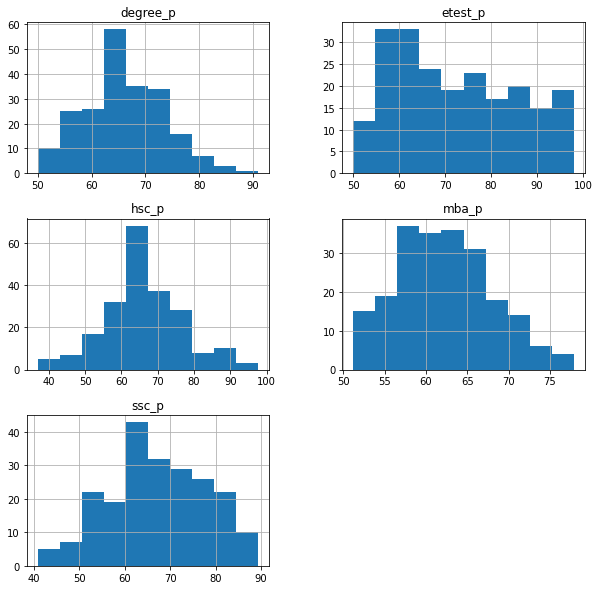

In [27]:
# Plotting Histograms to observe frequencies
X.hist(figsize=[10,10])

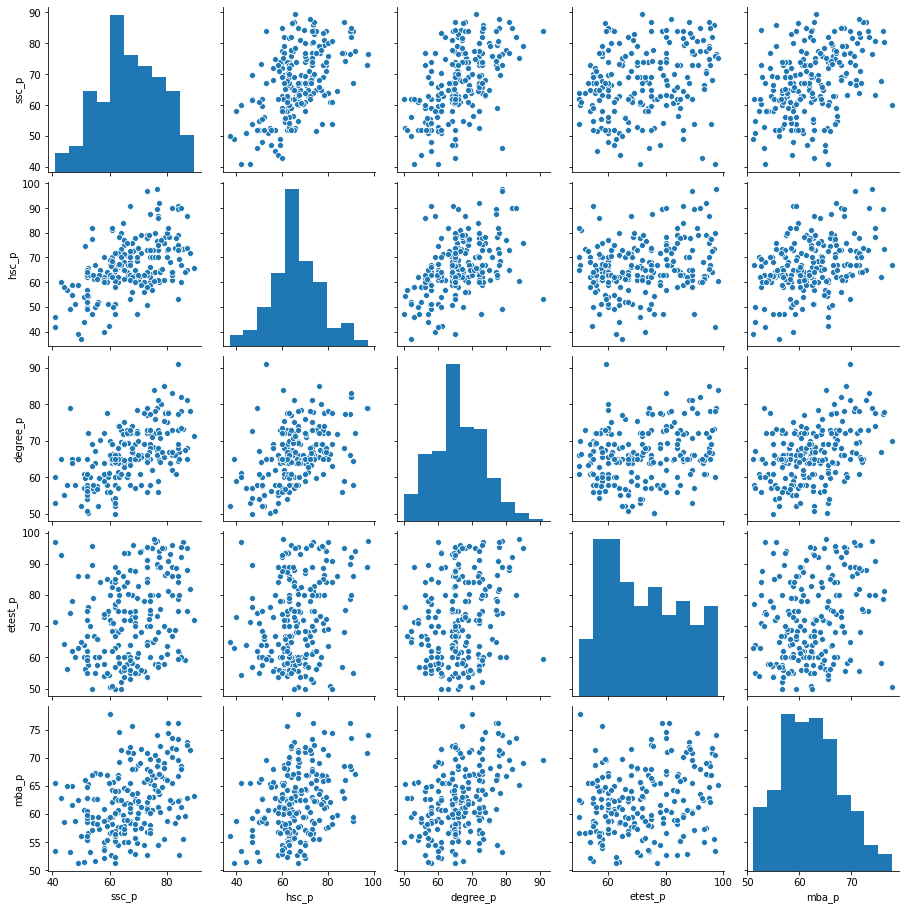

In [28]:
import seaborn as sns
sns.pairplot(X)

In [29]:
X.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


# Linear Regression

In [0]:
from sklearn import metrics
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS

In [32]:
X_label.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,73.30,0,0,96.8,0,55.50,1


In [33]:
Y.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_label, Y, test_size = 0.2)

In [0]:
reg = OLS(y_train, X_train).fit()

In [40]:
y_pred = pd.DataFrame()   # dataframe for predictions vs actual y-values
y_pred['predictions'] = reg.predict(X_test)

# Print this directly
print(reg.predict(X_test))

147    291687.260533
196    294743.997025
206     15555.087110
74     297266.539991
43     271317.797784
51      -3827.542102
193    319364.846663
3       17851.293022
47     313385.245007
163    320716.922764
22     273492.653001
88     247119.848868
103    312431.129701
99      15197.081832
159    -15684.578497
141    -24295.389725
50     254903.055751
30     238087.216274
128    308625.670004
4      264314.987476
146    268267.104442
134    315074.324653
90     269511.866321
190    -12826.999323
71     290327.101347
198     12817.465182
120    -20436.884152
23     334265.696416
161    -16839.335214
212    292703.500621
176    271086.193604
181     -6750.713647
60     273418.778824
139    288965.246459
214      6193.236066
106     37041.170669
49        -30.041892
39     313714.666592
104    269949.414077
21     267298.679640
149     18823.277892
24     320206.033563
98     276495.639398
dtype: float64


In [41]:
df = pd.DataFrame({'Actual': y_test["salary"], 'Predicted': y_pred["predictions"]})
df

,Actual,Predicted
147,300000.0,291687.260533
196,250000.0,294743.997025
206,0.0,15555.087110
74,336000.0,297266.539991
43,300000.0,271317.797784
51,0.0,-3827.542102
193,300000.0,319364.846663
3,0.0,17851.293022
47,204000.0,313385.245007
163,500000.0,320716.922764


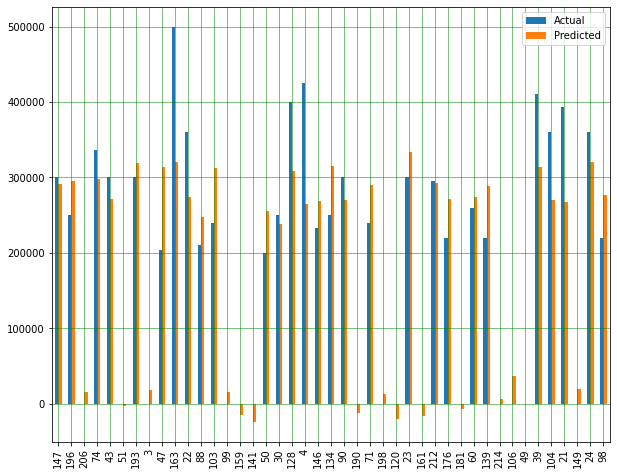

In [42]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 44840.118507914485
Mean Squared Error: 3735076494.520704
Root Mean Squared Error: 61115.27218724223
